## Gradient Descend With Python

In this file, we are going to take a look at how one step of gradient descend on a simple 2d scalar function is going to look like using python numpy. We are going to use the fastest gradient descend method. 

First, we are going to import things from numpy, and the first cell has to be run. 

In [7]:
from numpy import array, sin, cos, meshgrid, linspace 
from scipy.optimize import fminbound  # For find minimum of a function. 
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250  # High DPI for plotting stuff.

The `import ??? as ???` will make the names scape clearer, also instead of doing `np.array` we can just do `array` directly to get numpy array. 

Now let's define our scalar function: 
$$
   f(x, y) = (x - 2)^2 + (y + 1)^2 + 5\sin(x)\sin(y) + 100
$$
We are going to use the Lambda expression in python to do this. However, we have to keep in mind that, for Lambda expression in python, it doesn't support returning multiple arguments. 

In [8]:
f_multiple_inputs = lambda x, y: (x - 2)**2 + (y + 1)**2 + 5*sin(x)*sin(y) + 100

Now... how does this look like? 

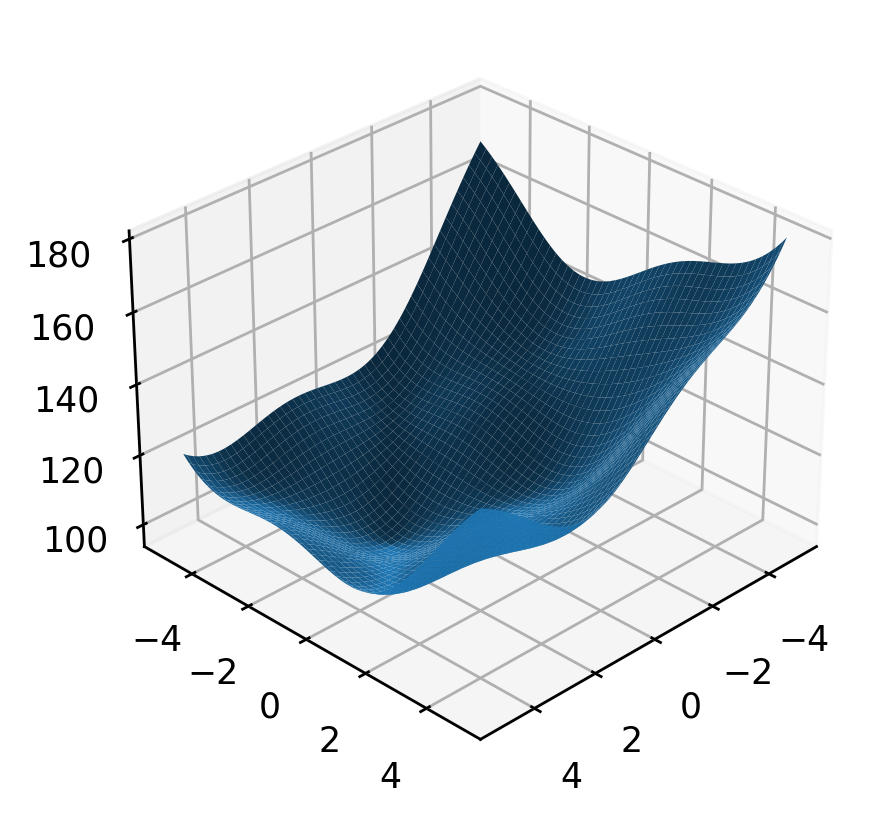

In [9]:
Xaxis = linspace(-5, 5, 100)
Yaxis = linspace(-5, 5, 100)
X, Y  = meshgrid(Xaxis, Yaxis)
fig   = plt.figure()
ax    = fig.gca(projection='3d')
Surf  = ax.plot_surface(X, Y, f_multiple_inputs(X, Y))

angle = 45  # Change Angle here. 
ax.view_init(30, angle)
plt.show()


Notice that this function takes in 2 arguments, but because we want to deal with numpy array, it will be better if we can treat the input as a vector $p$ of the form: $$
p = 
\begin{bmatrix}
    x \\ y
\end{bmatrix}
$$
and this is what it's going to look like: 


In [10]:
f = lambda p: f_multiple_inputs(p[0], p[1])  # This is call: The adapter function, it's just a wrapper. 

Looking good, now we might want to also define the gradient function. The gradient function is a vector field, meaing 2 inptus and 2 outputs. And remember that if we want to use the Lambda expression, then we can only output one arguments, well in this case, we are going to return a vector from our gradient function. And the gradient field is like: 
$$
\nabla f =
\begin{bmatrix}
    2(x - 2) + 5\cos(x)\sin(y)
    \\
    2(y + 1) + 5\sin(x)\cos(y)
\end{bmatrix}
$$
Great! Let's tell python about our exciting new gradient function! 

In [11]:
GradientX = lambda x, y: 2*(x - 2) + 5*sin(x)*cos(y)
GradientY = lambda x, y: 2*(y + 1) + 5*sin(x)*cos(y)
f_gradient = lambda p: array(
    [GradientX(p[0], p[1]), GradientY(p[0], p[1])]
)


And that is the gradient function, let's take a look. 



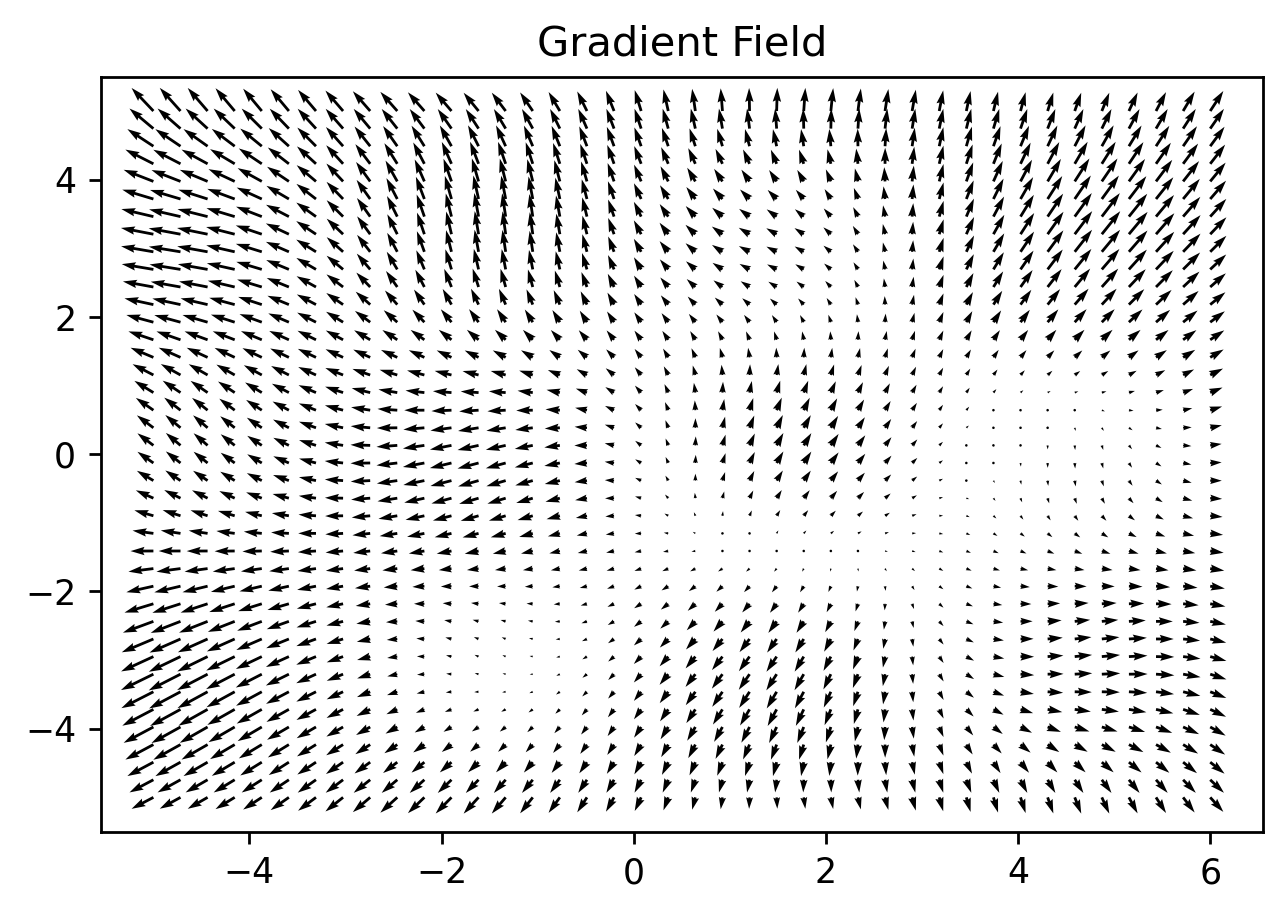

In [103]:
Xaxis = linspace(-5, 6, 40)
Yaxis = linspace(-5, 5, 40)
X, Y  = meshgrid(Xaxis, Yaxis)
U, V  = GradientX(X, Y), GradientY(X, Y)
fig1, ax1 = plt.subplots()
ax1.set_title('Gradient Field')
Q = ax1.quiver(X, Y, U, V, units='width')

It's pretty complicated, as you can see. 

Let's walk along the line with maximal gradient desciend, remember that it's given as: 

$$
\phi(t) = p_0 - t\nabla f(p_0)
$$
And we following the line until we reach the minimum on the scalar function $f$, so it's like the minimum of $f(\phi(t))$ 

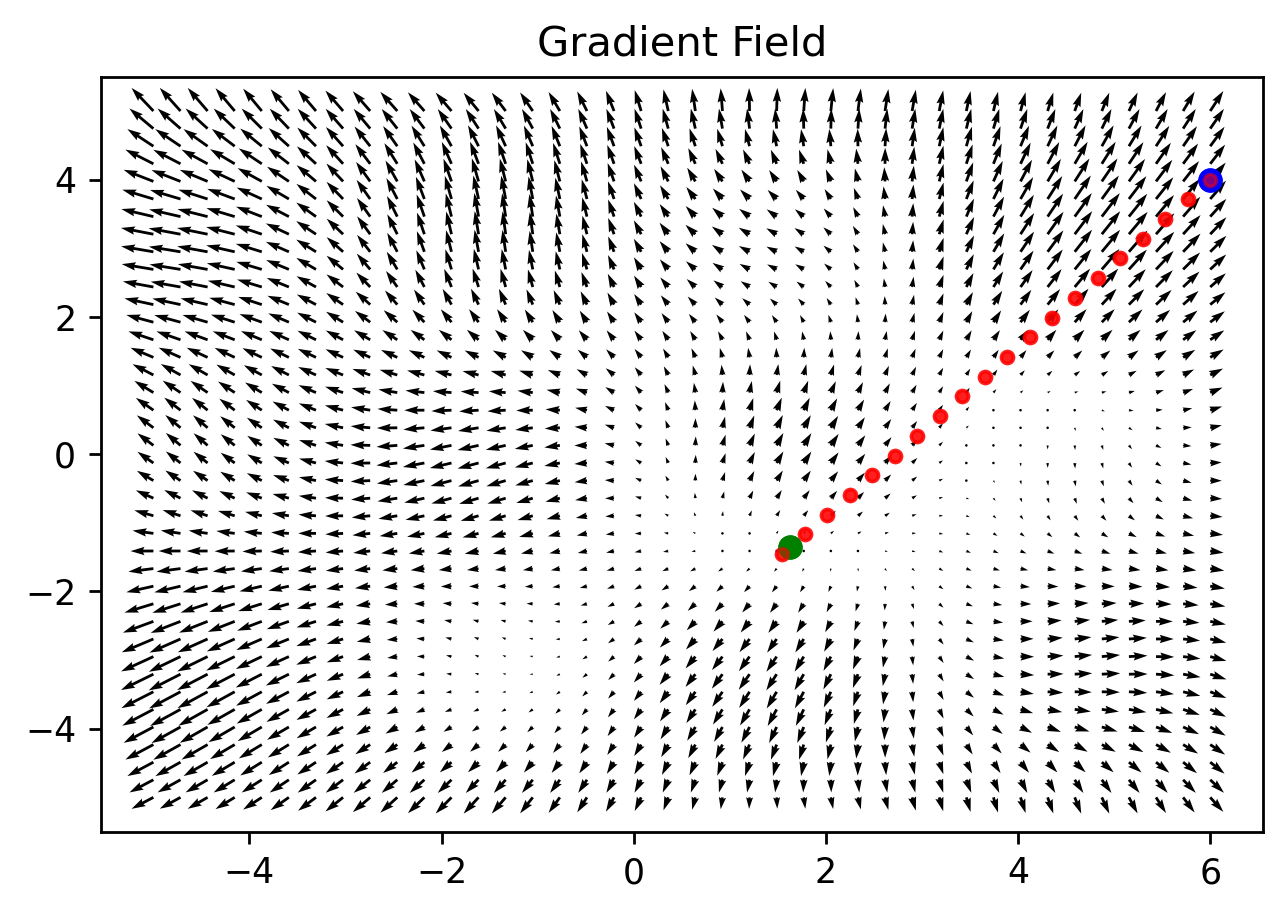

In [116]:
p0    = array([6, 4])  # Notice that this is a 1d array. 
phi   = lambda t: p0 - t*f_gradient(p0)
f_phi = lambda t: f(phi(t))
ax1.scatter(phi(0)[0], phi(0)[1], color="blue")
# Plot this out: 
for t in linspace(0, 0.5, 20):
    ax1.scatter(phi(t)[0], phi(t)[1], color="red", alpha=0.5, s=12)

fig1

The blue dot is the p_0 vector and the red dots are the dots as we advanced in the t direciton.
Now let's try to minimize on $f(\phi(t))$



In [117]:
fminbound(f_phi, 0, 1)

0.4904510439848181

This means that, when $t = 0.4904510439848181$, then the $f(\phi(t))$ is going to be the smallest, then, the point we are looking at will be like: $\phi(t)$

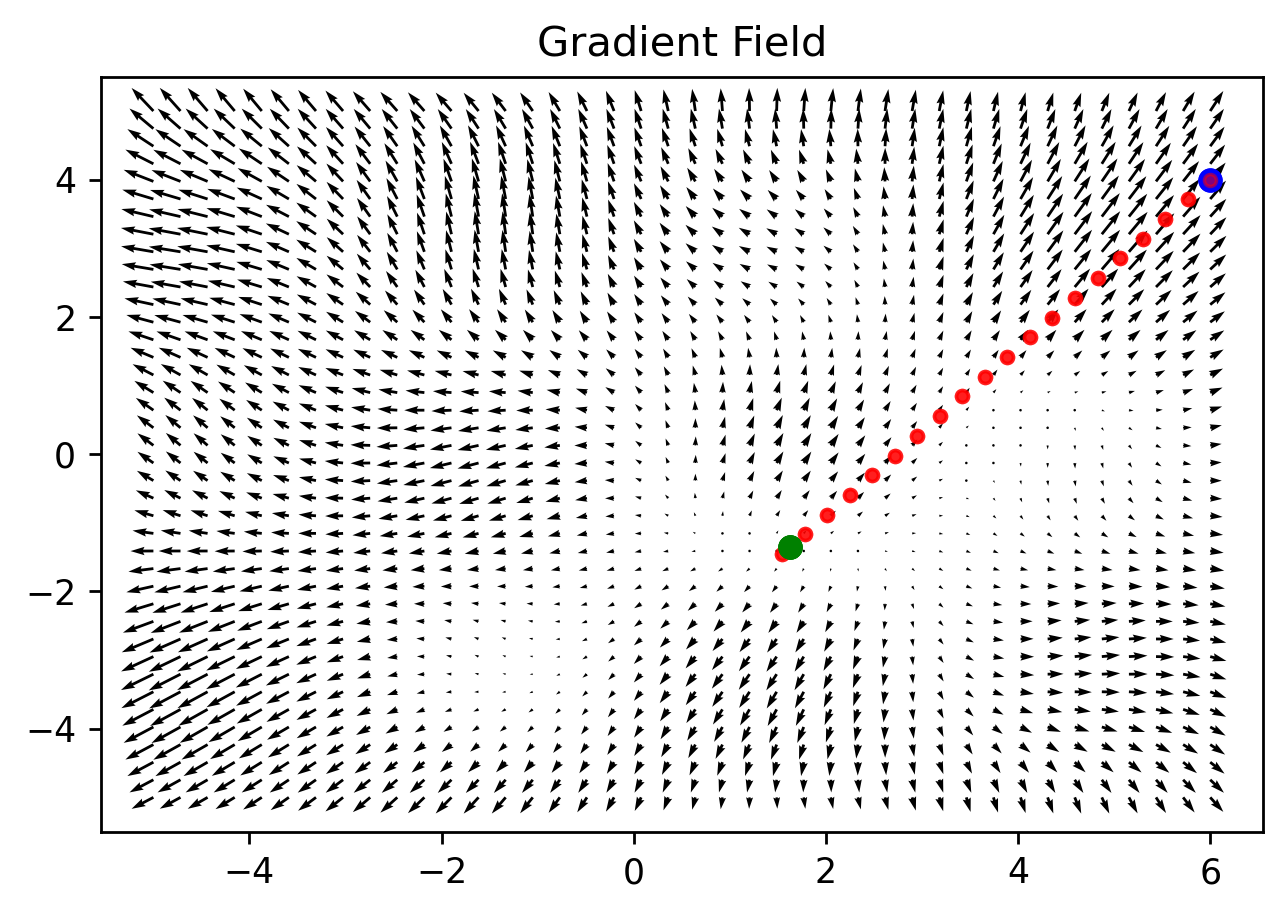

In [119]:
t_star = fminbound(f_phi, 0, 1)
ax1.scatter(phi(t_star)[0], phi(t_star)[1], color="green")
fig1

The green dot is the best pint and it's having a minium value. 

### The End
That is the end of one step of Gradient desciend, and for the next part, we just find the perpendicular direciton to minimize(or just find the new line using the gradient.)
Summary: 
1. Define f, the scalar function and gradient function. 
2. Using gradient to find the fastest descend direciton. 
3. Minimize $f(\phi(t))$ along that path.
4. Go back to 1. and start with the current best point.

There are other way to do this, like fixing the step size, that will make a more robust algorithm, refer to prof's Upsal's lecture on 4th November. 


Epilogue, here we are going to summarize everything into a compact routine that compute the gradient descend, but with a function.

In [ ]:
def gradient_fastest(f, fGradient, p0, deltT, maxItr = 200, tol = 1e-8):
    for I in range(maxItr):
        Phi = lambda t: p0 - t*fGradient(p0)
        FPhi = lambda t: f(Phi(t))

    pass